In [45]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [46]:
#reading all the different dataframes

df = pd.read_csv("modified_datasets/complete_dataset")
df_stocks = pd.read_csv("modified_datasets/stock_info_all")
df_ticks = pd.read_csv("modified_datasets/stock_ticks")
df_ticks_sent = pd.read_csv("modified_datasets/ticks_sent")
df_sentiment = pd.read_csv("modified_datasets/sentiment")
df_indices = pd.read_csv("modified_datasets/indices")
df_volumes = pd.read_csv("modified_datasets/stock_vol")

In [47]:
#returns

def returns(df):
    gm_returns = np.log(df).diff()
    return gm_returns

In [48]:
#Machine Learning Approaches
#fitting the model and predicitng
from sklearn import svm

def ml_model(df, col_pred, model):
    df = df.drop("Date", axis=1)
    X=df.loc[:, df.columns!=col_pred]
    Y=df[col_pred]
    split_point = int(0.75*len(df))
    x_train, x_test = X.iloc[:split_point],X.iloc[split_point:]
    y_train, y_test = Y.iloc[:split_point],Y.iloc[split_point:]

    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    evaluation_metrics(y_test, y_pred)
    return y_pred,y_test

In [49]:
#Evaluation metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

def evaluation_metrics(y_test, y_pred):
    err1 = explained_variance_score(y_test, y_pred)
    err2 = mean_squared_error(y_test, y_pred)
    err3 = mean_absolute_error(y_test, y_pred)
    print("Explained Variance Score", err1)
    print("Mean Squared Error", err2)
    print("Root Means Squared Error", sqrt(err2))

Explained Variance Score 0.00394950528716
Mean Squared Error 5.69460416794
Root Means Squared Error 2.3863369770288534


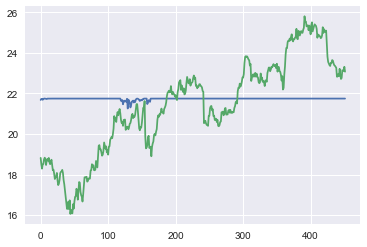

In [50]:
from sklearn import svm

pred,test = ml_model(df_ticks,'abb_close', svm.SVR())

plt.plot(pred)
plt.plot(list(test))

In [58]:
pdf = pd.DataFrame
for col in df_ticks:
    pdf.add(returns(df_ticks[col]),axis='column')
    

TypeError: f() missing 1 required positional argument: 'other'

In [54]:
df_ticks

,abb_close,asys_close,ccgi_close,cenx_close,cmi_close,fslr_close,ge_close,pcrfy_close,tsla_close
0,17.490000,8.27,45.000000,9.070000,66.239998,114.419998,14.480000,12.47,23.889999
1,17.280001,8.35,42.500000,8.830000,65.129997,113.830002,14.420000,12.53,23.830000
2,17.590000,8.71,44.500000,8.680000,64.820000,117.449997,14.120000,12.43,21.959999
3,17.430000,8.59,45.000000,8.600000,64.239998,120.519997,13.880000,12.45,19.200001
4,17.690001,8.60,37.500000,8.610000,63.570000,121.879997,13.970000,12.81,16.110001
5,18.360001,8.67,35.500000,9.190000,67.410004,128.479996,14.620000,13.07,15.800000
6,18.660000,8.65,39.000000,9.470000,68.940002,130.649994,14.830000,13.42,17.459999
7,18.860001,8.69,45.000000,9.770000,71.529999,132.130005,14.950000,13.42,17.400000
8,18.139999,8.59,43.000000,9.590000,70.660004,129.710007,14.930000,13.43,17.049999
9,18.600000,8.61,38.000000,9.930000,73.730003,130.639999,15.210000,13.49,18.139999
